# Regression 

En este laboratorio se trabajará un conjunto de datos que indica ciertas características físicas y rutinarias de las personas. Se pretende crear varios modelos de regresión lineal y polinomial. En base a dichos modelos, desarollados con las características de distintos usuarios, será posible predecir los 'charges' de cada persona. 

Este conjunto de datos contiene las siguientes características:


* 'Age': edad la persona
* 'BMI': índice de masa corporal de la persona
* 'Children': si tiene hijos o no
* 'Smoker': si fuma o no
* 'Sex': si el consumidor es mujer u hombre
* 'Region': región del consumidor
* 'Charges': cargos de del ususario

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('insurance.csv') 

**Check the head of ad_data**

In [3]:
df.head() #visualizacion de algunas filas

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Preparación de los datos - datos faltantes

In [4]:
print("Cantidad de registros: ", len(df))

Cantidad de registros:  348


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [6]:
df.describe() #visualizacion de algunas filas

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


## Exploración de los datos

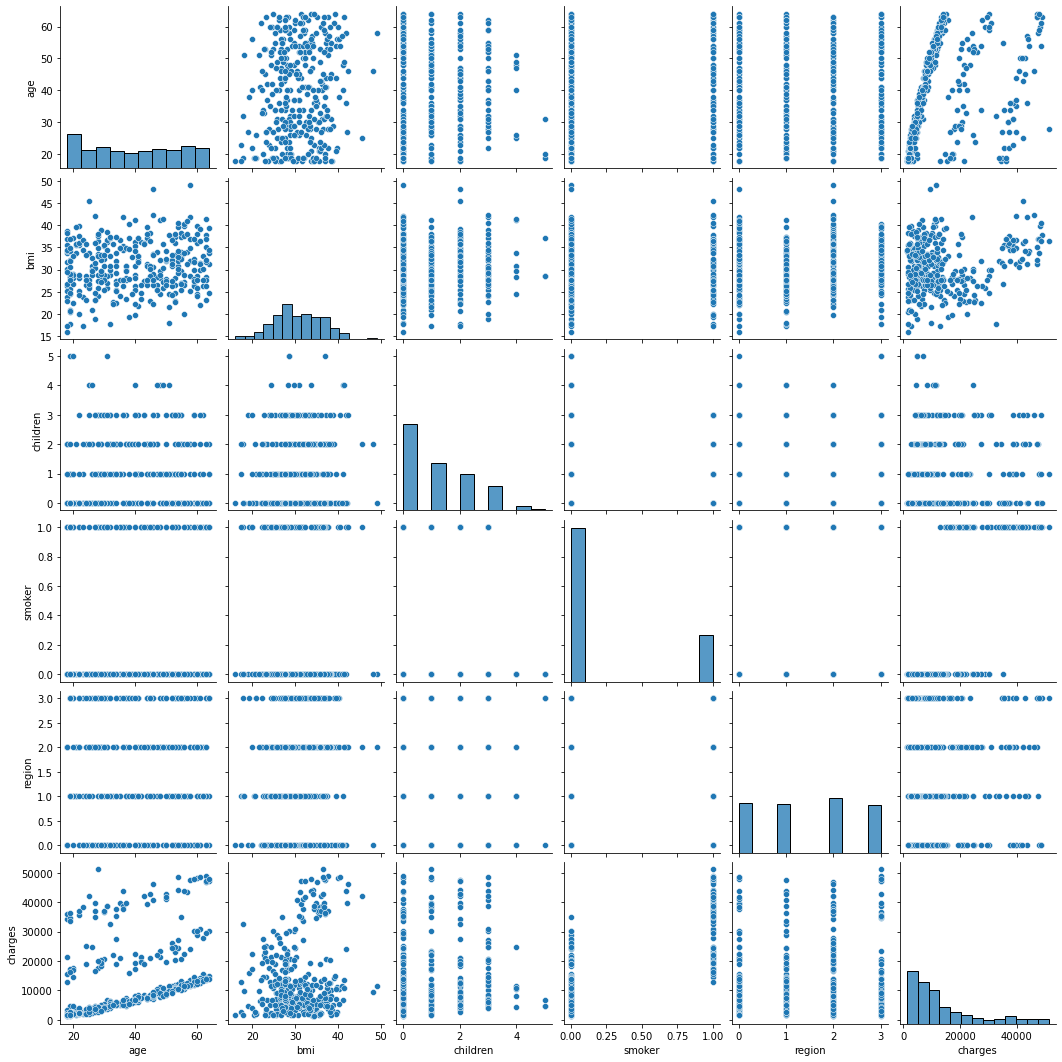

In [15]:
sns.pairplot(df[['age','bmi','children','smoker','region','charges']])
plt.show()

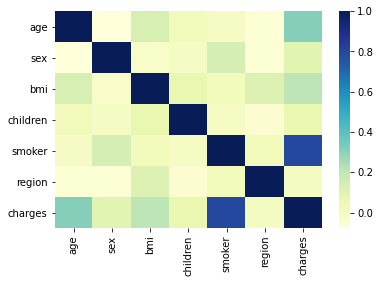

In [16]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

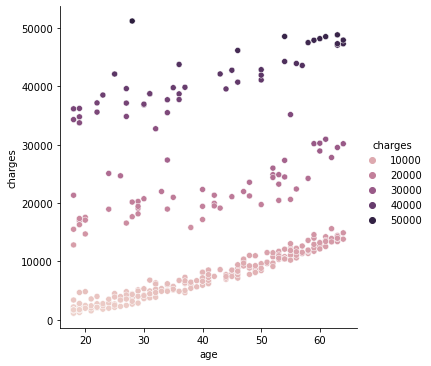

In [17]:
#age v charges
sns.relplot(data=df,x="age",y="charges",hue="charges")
plt.show()

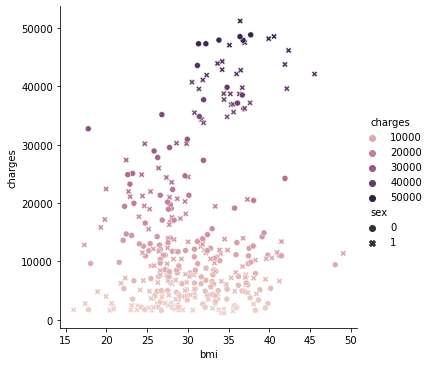

In [19]:
#bmi vs Charges diferenciando sex
sns.relplot(data=df,x="bmi",y='charges',hue="charges",style="sex")
plt.show()

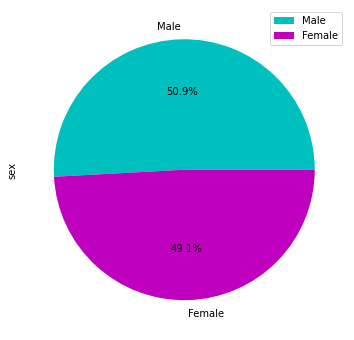

In [10]:
#distributuion of sex
plt.figure(figsize=(6,6))
my_lab=["Male","Female"]
mycolors = ["c", "m"]
df.sex.value_counts().plot(kind='pie',labels=my_lab, colors = mycolors, autopct='%1.1f%%')
plt.legend()
plt.show()

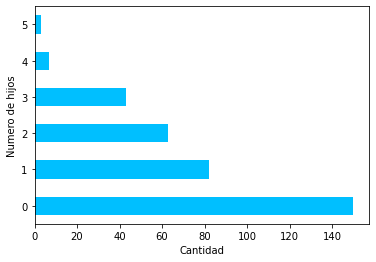

In [8]:
#Cantidad of childern
df.children.value_counts().plot(kind="barh",color="deepskyblue")
plt.xlabel("Cantidad")
plt.ylabel("Numero de hijos")
plt.show()

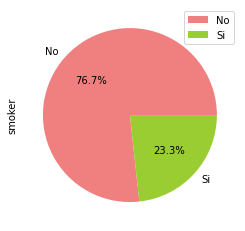

In [12]:
#Smoker or not
my_lab=["No","Si"]
mycolors = ["lightcoral", "yellowgreen"]
df.smoker.value_counts().plot(kind='pie', labels=my_lab, colors = mycolors, autopct='%1.1f%%')
plt.legend()
plt.show()

## Preparación de los datos – datos categóricos

**Label Encoder para codificar los campos de sex y smoker**

In [3]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df["labeled_sex"] = le_sex.fit_transform(df["sex"])
df

,age,sex,bmi,children,smoker,region,charges,labeled_sex
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035,1
344,49,0,41.470,4,0,2,10977.20630,0
345,34,0,29.260,3,0,2,6184.29940,0
346,33,1,35.750,2,0,2,4889.99950,1


In [4]:
le_smoker = LabelEncoder()
df["labeled_smoker"] = le_smoker.fit_transform(df["smoker"])
df

,age,sex,bmi,children,smoker,region,charges,labeled_sex,labeled_smoker
0,19,0,27.900,0,1,3,16884.92400,0,1
1,18,1,33.770,1,0,2,1725.55230,1,0
2,28,1,33.000,3,0,2,4449.46200,1,0
3,33,1,22.705,0,0,1,21984.47061,1,0
4,32,1,28.880,0,0,1,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035,1,0
344,49,0,41.470,4,0,2,10977.20630,0,0
345,34,0,29.260,3,0,2,6184.29940,0,0
346,33,1,35.750,2,0,2,4889.99950,1,0


**On Hot Encoder para el region**

In [5]:
#forma 1
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df3 = pd.DataFrame(ohe.fit_transform(df[["region"]]).toarray())
df_new=pd.concat([df,df3],axis=1)
df_new

,age,sex,bmi,children,smoker,region,charges,labeled_sex,labeled_smoker,0,1,2,3
0,19,0,27.900,0,1,3,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035,1,0,1.0,0.0,0.0,0.0
344,49,0,41.470,4,0,2,10977.20630,0,0,0.0,0.0,1.0,0.0
345,34,0,29.260,3,0,2,6184.29940,0,0,0.0,0.0,1.0,0.0
346,33,1,35.750,2,0,2,4889.99950,1,0,0.0,0.0,1.0,0.0


In [6]:
#forma 2
df = pd.get_dummies(df, columns=["region"])
df.head()

,age,sex,bmi,children,smoker,charges,labeled_sex,labeled_smoker,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1,0,1725.55230,1,0,0,0,1,0
2,28,1,33.000,3,0,4449.46200,1,0,0,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0,1,0,0


## Dividir en training y test - preparación escala

In [7]:
#Splitting the data y elección de la columna "charges" para predecirla
target=df["charges"]
data=np.array(df['bmi'])
data=data.reshape(len(df), 1)

## Preparación de los datos - escala

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)
print(data,target)

[[-4.94245241e-01]
 [ 5.50655000e-01]
 [ 4.13589721e-01]
 [-1.41899085e+00]
 [-3.19798523e-01]
 [-8.78740049e-01]
 [ 4.91912738e-01]
 [-5.22726338e-01]
 [-1.50692010e-01]
 [-8.60939363e-01]
 [-7.93296758e-01]
 [-7.80836278e-01]
 [ 6.62799319e-01]
 [ 1.62759647e+00]
 [ 2.03879231e+00]
 [-1.08166786e+00]
 [ 1.84145023e-02]
 [-1.21606304e+00]
 [ 1.71303977e+00]
 [ 8.23005489e-01]
 [ 9.48500322e-01]
 [ 3.06785608e-01]
 [ 6.09397262e-01]
 [ 2.21342317e-01]
 [-4.71994384e-01]
 [-5.26286475e-01]
 [-1.35134825e+00]
 [ 3.73538179e-01]
 [-2.36598733e+00]
 [ 1.00101234e+00]
 [ 8.76407545e-01]
 [-7.76386107e-01]
 [-3.69640442e-01]
 [-4.21262431e-01]
 [ 1.01881303e+00]
 [-1.82484649e+00]
 [ 4.07359481e-01]
 [-1.75809391e+00]
 [ 1.06687488e+00]
 [ 1.64183702e+00]
 [-7.25654153e-01]
 [ 1.05975461e+00]
 [-1.58364720e+00]
 [ 2.19746394e-02]
 [ 1.13451749e+00]
 [ 1.17901920e+00]
 [ 1.42199856e+00]
 [ 7.28661855e-01]
 [-1.09412834e+00]
 [ 8.05204803e-01]
 [ 8.80857717e-01]
 [ 5.25734040e-01]
 [-4.7644455

In [9]:
#Splitting en train y test
from sklearn.model_selection import train_test_split
x_trainA,x_testA,y_trainA,y_testA =train_test_split(data,target,test_size=.3)
x_trainB,x_testB,y_trainB,y_testB =train_test_split(data,target,test_size=.3)
x_trainBp,x_testBp,y_trainBp,y_testBp =train_test_split(data,target,test_size=.3)

print(x_trainA,y_trainB)

[[-0.75947546]
 [ 0.42427013]
 [-0.47199438]
 [ 0.37353818]
 [-0.61885004]
 [ 0.25516362]
 [-0.72565415]
 [-0.70251326]
 [-0.23257516]
 [-0.11687071]
 [ 3.09615303]
 [-1.34867815]
 [ 0.89776837]
 [ 0.53107425]
 [-0.40524181]
 [ 1.12561714]
 [-0.36964044]
 [ 0.74557251]
 [-0.38744113]
 [ 0.73400206]
 [ 0.03532515]
 [-0.55654764]
 [ 1.56885421]
 [ 1.303624  ]
 [ 0.23736293]
 [ 1.08378553]
 [-0.31623839]
 [ 1.64183702]
 [-2.36598733]
 [ 0.94227008]
 [ 0.89776837]
 [ 0.86394707]
 [ 1.03305358]
 [ 0.47500209]
 [ 1.58843497]
 [ 1.68633874]
 [-0.92858197]
 [-0.19341366]
 [ 0.73400206]
 [-0.49424524]
 [ 0.02197464]
 [ 0.30678561]
 [ 1.57419442]
 [-0.77638611]
 [ 1.92130779]
 [-0.13467139]
 [ 0.47233198]
 [ 0.41358972]
 [-2.29211448]
 [ 0.72866186]
 [-2.61964709]
 [ 1.18524944]
 [-0.52628648]
 [-0.92858197]
 [-0.42126243]
 [-1.49108363]
 [ 1.35346592]
 [-1.90939974]
 [-0.86093936]
 [-0.35361983]
 [-0.4230425 ]
 [-1.3682589 ]
 [ 0.59337665]
 [ 1.92130779]
 [-1.3006163 ]
 [-1.43590151]
 [ 0.94761

## Modelación lineal

**modelo 1 (sin librería)**

In [10]:
from sklearn.metrics import mean_squared_error,r2_score
#Usando bmi
n = x_trainA.shape[1]
r = np.linalg.matrix_rank(x_trainA)
U, sigma, VT = np.linalg.svd(x_trainA, full_matrices=False)
print(U, sigma, VT)

[[-0.04763251]
 [ 0.02660922]
 [-0.02960238]
 [ 0.02342743]
 [-0.03881282]
 [ 0.01600326]
 [-0.04551132]
 [-0.04405998]
 [-0.01458657]
 [-0.00732986]
 [ 0.19418342]
 [-0.08458591]
 [ 0.05630592]
 [ 0.03330772]
 [-0.02541581]
 [ 0.07059605]
 [-0.02318298]
 [ 0.04676055]
 [-0.02429939]
 [ 0.04603488]
 [ 0.00221551]
 [-0.03490536]
 [ 0.09839484]
 [ 0.08176022]
 [ 0.01488684]
 [ 0.06797247]
 [-0.01983373]
 [ 0.10297215]
 [-0.14838915]
 [ 0.05909696]
 [ 0.05630592]
 [ 0.05418472]
 [ 0.06479068]
 [ 0.02979101]
 [ 0.0996229 ]
 [ 0.10576319]
 [-0.05823847]
 [-0.01213045]
 [ 0.04603488]
 [-0.0309979 ]
 [ 0.0013782 ]
 [ 0.01924087]
 [ 0.09872976]
 [-0.04869311]
 [ 0.12049989]
 [-0.00844627]
 [ 0.02962355]
 [ 0.02593937]
 [-0.14375602]
 [ 0.04569995]
 [-0.16429809]
 [ 0.07433605]
 [-0.03300745]
 [-0.05823847]
 [-0.02642059]
 [-0.09351725]
 [ 0.08488619]
 [-0.11975305]
 [-0.05399609]
 [-0.0221782 ]
 [-0.02653223]
 [-0.08581397]
 [ 0.03721518]
 [ 0.12049989]
 [-0.08157159]
 [-0.09005636]
 [ 0.05943

In [11]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))
V = VT.T
print(D_plus)
print(V)

[[0.06271764]]
[[1.]]


In [12]:
X_plus = V.dot(D_plus).dot(U.T)
w = X_plus.dot(y_trainA)
print(X_plus)
print(w)

[[-2.98739874e-03  1.66886770e-03 -1.85659117e-03  1.46931343e-03
  -2.43424829e-03  1.00368678e-03 -2.85436255e-03 -2.76333780e-03
  -9.14835029e-04 -4.59711242e-04  1.21787262e-02 -5.30502910e-03
   3.53137428e-03  2.08898197e-03 -1.59401976e-03  4.42761804e-03
  -1.45398167e-03  2.93271145e-03 -1.52400071e-03  2.88719907e-03
   1.38951586e-04 -2.18918163e-03  6.17109224e-03  5.12780848e-03
   9.33667737e-04  4.26307329e-03 -1.24392454e-03  6.45817032e-03
  -9.30661747e-03  3.70642189e-03  3.53137428e-03  3.39833809e-03
   4.06351901e-03  1.86842198e-03  6.24811319e-03  6.63321793e-03
  -3.65257966e-03 -7.60793132e-04  2.88719907e-03 -1.94411498e-03
   8.64373028e-05  1.20674201e-03  6.19209796e-03 -3.05391683e-03
   7.55746932e-03 -5.29730286e-04  1.85791912e-03  1.62685627e-03
  -9.01603844e-03  2.86619336e-03 -1.03043889e-02  4.66218184e-03
  -2.07014926e-03 -3.65257966e-03 -1.65703690e-03 -5.86518145e-03
   5.32386181e-03 -7.51062899e-03 -3.38650729e-03 -1.39096453e-03
  -1.66403

In [13]:
error = np.linalg.norm(x_trainA.dot(w) - y_trainA, ord=2) ** 2
print(error)

93133829264.44078


In [14]:
np.linalg.lstsq(x_trainA, y_trainA)

<ipython-input-14-038c38aaba46>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(x_trainA, y_trainA)


(array([3796.66725941]), array([9.31338293e+10]), 1, array([15.94447688]))

**modelo 2 (con librería)**

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [16]:
#Training la data con BMI
lr.fit(x_trainB,y_trainB)
w2 = lr.coef_[0]
print(w2)

2750.702214787475


**modelo 3 (con librería)**

In [17]:
target_c=df['charges']
data_c=df.drop(columns=['charges'])
data_c=sc.fit_transform(data_c)

In [18]:
x_trainC,x_testC,y_trainC,y_testC=train_test_split(data_c,target_c,test_size=.3)
x_trainCp,x_testCp,y_trainCp,y_testCp=train_test_split(data_c,target_c,test_size=.3)
print(x_trainC, y_trainC)

[[-1.49982813  0.98290472  0.550655   ... -0.56850147  1.63191847
  -0.55522129]
 [ 0.0978062  -1.01739261  0.17061036 ... -0.56850147 -0.61277571
  -0.55522129]
 [ 0.0978062  -1.01739261  1.14341783 ... -0.56850147 -0.61277571
   1.80108368]
 ...
 [ 0.44511801 -1.01739261 -0.52272634 ...  1.75901042 -0.61277571
  -0.55522129]
 [-0.11058089  0.98290472  0.71620138 ... -0.56850147 -0.61277571
   1.80108368]
 [ 1.27866635  0.98290472  1.11760683 ...  1.75901042 -0.61277571
  -0.55522129]] 1       1725.55230
228     7358.17565
215     7371.77200
247     1986.93340
341    13352.09980
          ...     
50      2211.13075
267    14590.63205
88      8026.66660
129     6082.40500
55     47496.49445
Name: charges, Length: 243, dtype: float64


In [19]:
lr_c = LinearRegression()
lr_c.fit(x_trainC, y_trainC)
w3 = lr_c.coef_[0]
print(w3)

4098.962376236883


## Evaluación de modelos

**modelo 1**

In [21]:
from sklearn.metrics import mean_absolute_error
#train data
print(mean_squared_error(lr.predict(x_trainA),y_trainA))
print(r2_score(lr.predict(x_trainA),y_trainA))
print(mean_absolute_error(lr.predict(x_trainA), y_trainA))

171861827.5824608
-20.756528196400208
10664.75573459395


In [22]:
#test data
print(mean_squared_error(lr.predict(x_testA),y_testA))
print(r2_score(lr.predict(x_testA),y_testA))
print(mean_absolute_error(lr.predict(x_testA), y_testA))

106911476.47814861
-15.032345689714223
8240.152805604483


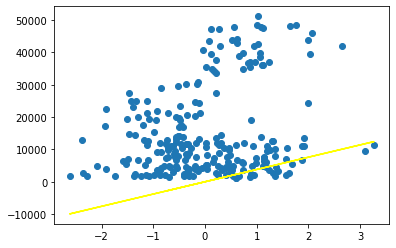

In [26]:
#graficación de los resultados
plt.scatter(x_trainA, y_trainA)
plt.plot(x_trainA, w*x_trainA, c='yellow')

**modelo 2**

In [27]:
#train data
print(mean_squared_error(lr.predict(x_trainB),y_trainB))
print(r2_score(lr.predict(x_trainB),y_trainB))
print(mean_absolute_error(lr.predict(x_trainB), y_trainB))

154730820.70977762
-19.89548300409495
9978.182784924107


In [28]:
#test data
print(mean_squared_error(lr.predict(x_testB),y_testB))
print(r2_score(lr.predict(x_testB),y_testB))
print(mean_absolute_error(lr.predict(x_testB), y_testB))

146557520.95492962
-17.511210971213572
9829.078774840393


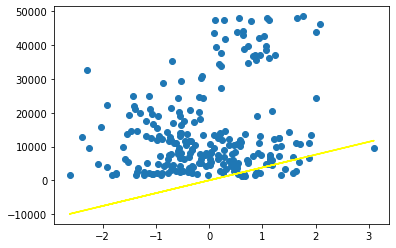

In [32]:
#graficacion de la data entrenada
plt.scatter(x_trainB, y_trainB)
plt.plot(x_trainB, w*x_trainB, c='yellow')

In [35]:
#p-values
import statsmodels.api as sm

X2 = sm.add_constant(df)
est = sm.OLS(target, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.216e+31
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:52:57   Log-Likelihood:                 8212.5
No. Observations:                 348   AIC:                        -1.641e+04
Df Residuals:                     338   BIC:                        -1.637e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.183e-12   3.88e-12     -0.

**modelo 3**

In [37]:
#train data
print(mean_squared_error(lr_c.predict(x_trainC),y_trainC))
print(r2_score(lr_c.predict(x_trainC),y_trainC))
print(mean_absolute_error(lr_c.predict(x_trainC), y_trainC))

40211847.45231889
0.6394121730976938
4446.509843020969


In [38]:
#test data
print(mean_squared_error(lr_c.predict(x_testC),y_testC))
print(r2_score(lr_c.predict(x_testC),y_testC))
print(mean_absolute_error(lr_c.predict(x_testC), y_testC))

27813558.779042557
0.7940053673577131
4066.795234775514


In [40]:
X3 = sm.add_constant(df)
est = sm.OLS(target_c, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.216e+31
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:03:07   Log-Likelihood:                 8212.5
No. Observations:                 348   AIC:                        -1.641e+04
Df Residuals:                     338   BIC:                        -1.637e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.183e-12   3.88e-12     -0.

## Regresion polinomial

**modelo 2**

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
grado=2
polyreg=make_pipeline(PolynomialFeatures(grado),LinearRegression())
polyreg.fit(x_trainBp,y_trainBp)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

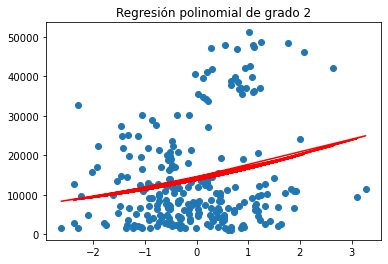

151094918.98186207
-18.985998061181988
9887.623463530665


In [44]:
#train data
plt.figure()
plt.scatter(x_trainBp,y_trainBp)
plt.plot(x_trainBp,polyreg.predict(x_trainBp),color="red")
plt.title("Regresión polinomial de grado "+str(grado))
plt.show()
print(mean_squared_error(polyreg.predict(x_trainBp),y_trainBp))
print(r2_score(polyreg.predict(x_trainBp),y_trainBp))
print(mean_absolute_error(polyreg.predict(x_trainBp), y_trainBp))

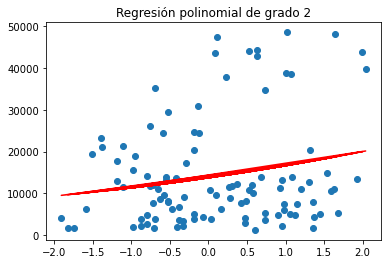

154562639.28068462
-22.267578920673483
9897.778353929572


In [46]:
#test data
plt.figure()
plt.scatter(x_testBp,y_testBp)
plt.plot(x_testBp,polyreg.predict(x_testBp),color="red")
plt.title("Regresión polinomial de grado "+str(grado))
plt.show()
print(mean_squared_error(polyreg.predict(x_testBp),y_testBp))
print(r2_score(polyreg.predict(x_testBp),y_testBp))
print(mean_absolute_error(polyreg.predict(x_testBp), y_testBp))

**modelo 3**

In [47]:
polyreg3=make_pipeline(PolynomialFeatures(grado),LinearRegression())
polyreg3.fit(x_trainCp,y_trainCp)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [48]:
#train data
print(mean_squared_error(polyreg3.predict(x_trainCp),y_trainCp))
print(r2_score(polyreg3.predict(x_trainCp),y_trainCp))
print(mean_absolute_error(polyreg3.predict(x_trainCp), y_trainCp))

20410446.439592738
0.874196326212864
2579.5735338683126


In [49]:
#test data
print(mean_squared_error(polyreg3.predict(x_testCp),y_testCp))
print(r2_score(polyreg3.predict(x_testCp),y_testCp))
print(mean_absolute_error(polyreg3.predict(x_testCp), y_testCp))

23072669.07394339
0.7875220543392588
2657.909713619047
